# LOAD LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import logging
import time

from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# LOAD DATA

In [2]:
data = pd.read_csv('handwr_alph.csv')

In [3]:
data.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


# PREPARE DATA

In [4]:
x = data.drop('0', axis=1)
y = data['0']

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.33)

In [5]:
# Size of data
print("Data Shape:", x.shape)

Data Shape: (372450, 784)


# DISPLAY DATA

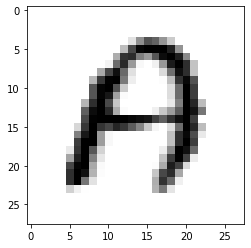

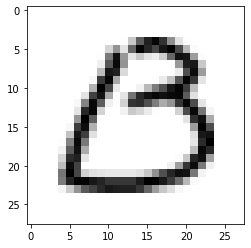

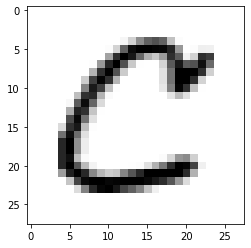

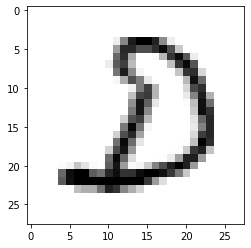

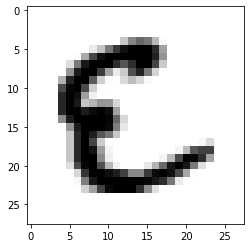

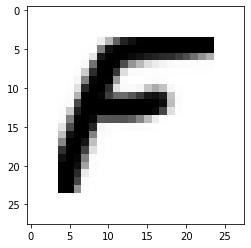

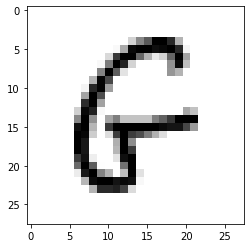

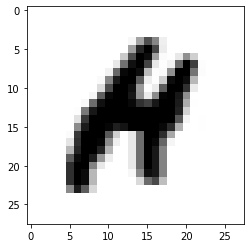

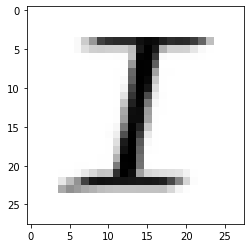

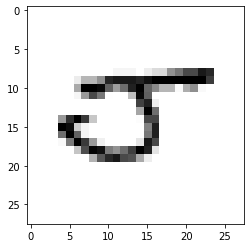

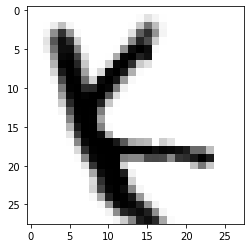

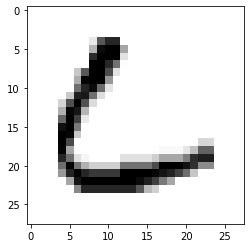

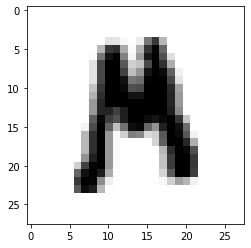

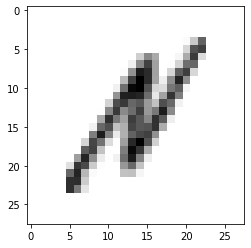

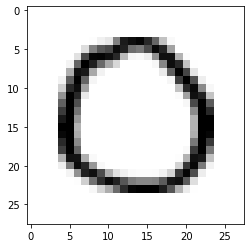

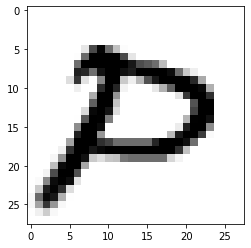

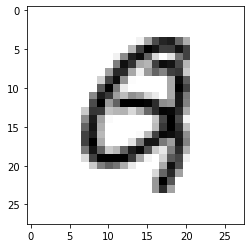

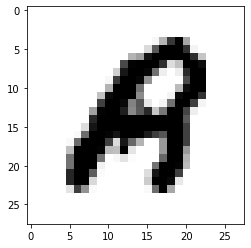

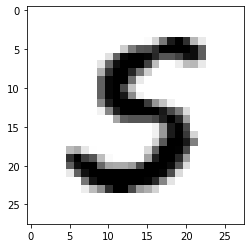

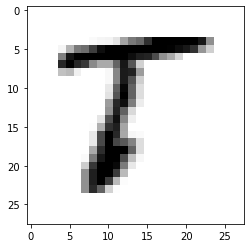

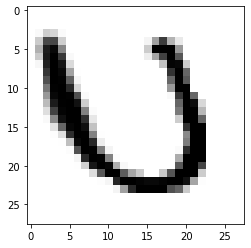

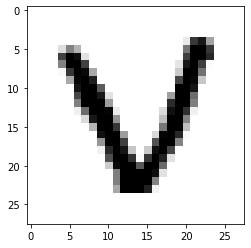

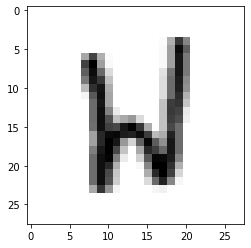

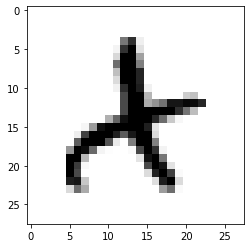

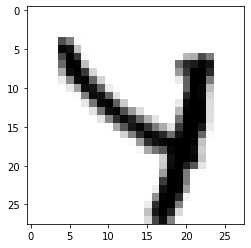

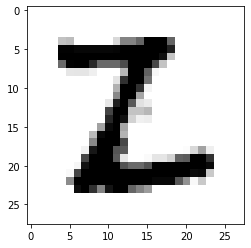

In [6]:
for i in range(26):
    a = data[data['0']==i].iloc[1]
    alph = a[1:].values
    plt.imshow(alph.reshape(28,28), cmap='binary')
    plt.show()

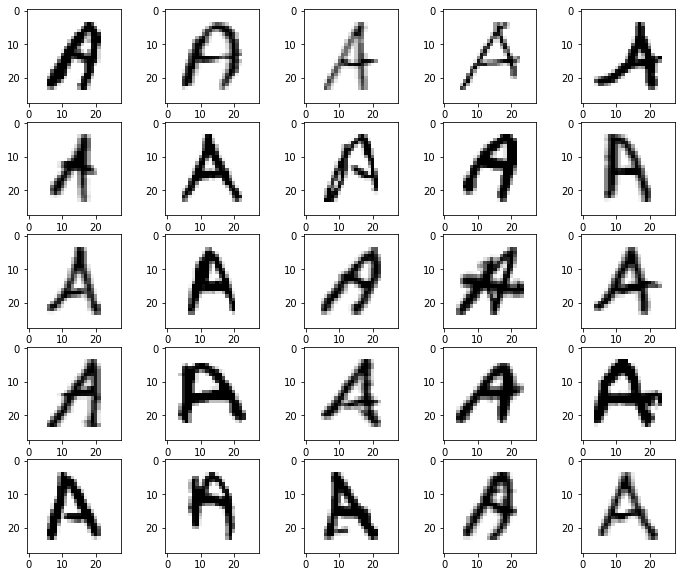

In [7]:
plt.figure(figsize =(12, 10))
row, columns = 5, 5
for i in range (25):
    plt.subplot(columns, row, i+1)
    plt.imshow(x.iloc[i].values.reshape(28,28), cmap='binary')
plt.show()

In [8]:
alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 
           'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 
           'R', 'S', 'T', 'Y', 'V', 'W', 'X', 'Y', 'Z']

alph_dict = {}   

for i in range(26):
    alph_dict.update({i : alphabet[i]})

In [9]:
layout1 = widgets.Layout(width='auto', height='40px')
button1 = widgets.Button(description='VIEW ALPHABET DICTIONARY', layout=layout1)
output1 = widgets.Output()

y_ax = np.int0(y)
img_ltr = np.zeros(26, dtype = 'int')

for i in y_ax:
    img_ltr[i] +=1

    
alphabets_ct = []

for i in alph_dict.values():
    alphabets_ct.append(i)
  

display(button1, output1)

def on_button_clicked1(b):
    with output1:
        print(alphabet)

button1.on_click(on_button_clicked1)

Button(description='VIEW ALPHABET DICTIONARY', layout=Layout(height='40px', width='auto'), style=ButtonStyle()…

Output()

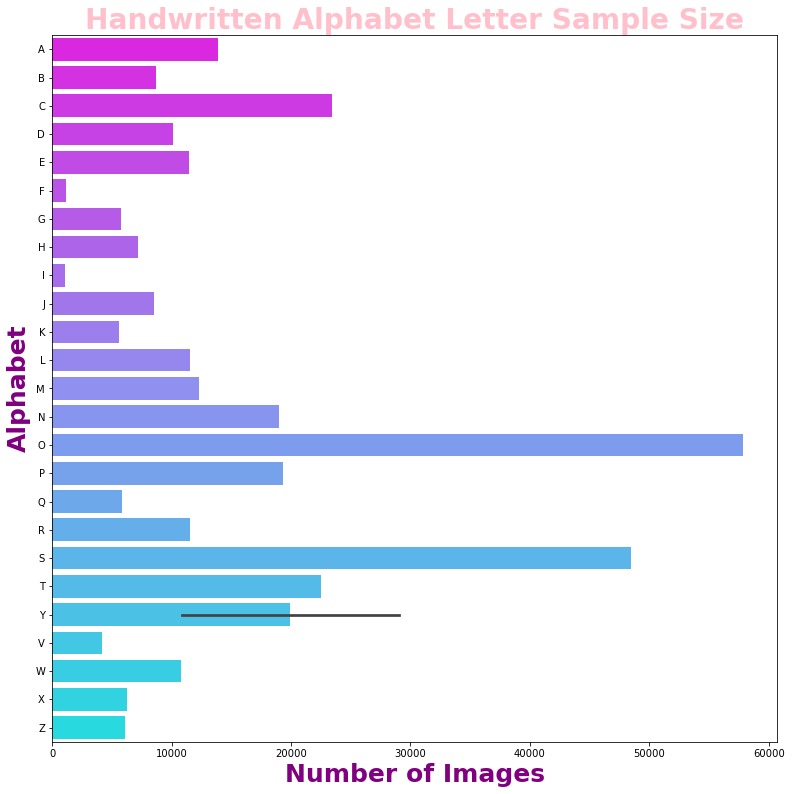

In [10]:
plt.figure(figsize=(13,13))
sns.barplot(y = alphabet, x = img_ltr, palette ='cool_r')
plt.title("Handwritten Alphabet Letter Sample Size", fontsize=28,
         fontweight='bold', color='pink')
plt.xlabel("Number of Images", fontsize=25, fontweight='bold', color='purple')
plt.ylabel("Alphabet", fontsize=25, fontweight='bold', color='purple')
plt.show()

In [11]:
layout2 = widgets.Layout(width='auto', height='40px')
button2 = widgets.Button(description='VIEW PIE CHART ANALYSIS', layout=layout2)
output2 = widgets.Output()

display(button2, output2)

def on_button_clicked2(b):
    with output2:
        plt.figure(figsize=[10, 10])
        plt.pie(img_ltr, labels=alphabet, startangle=90, shadow=True, explode=(0.1,)*23 + (0.5, 0.7, 0.8),)
        plt.show()

button2.on_click(on_button_clicked2)

Button(description='VIEW PIE CHART ANALYSIS', layout=Layout(height='40px', width='auto'), style=ButtonStyle())

Output()

# RANDOM FOREST CLASSIFIER MODEL

In [12]:
rfc = RandomForestClassifier()

start = time.time()
rfc.fit(train_x, train_y)
end = time.time() - start

print(f'({end:.2f})s elapsed during training') 

test_pred = rfc.predict(test_x)
print("Test Accuracy: ", accuracy_score(test_y, test_pred)*100.0,"%")

(204.85)s elapsed during training
Test Accuracy:  98.18890398587573 %


# 

# CLASSIFICATION REPORT

In [13]:
def eval(rfc, train_x, train_y):
    errors = abs(test_pred)

In [14]:
print(classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4680
           1       0.98      0.96      0.97      2861
           2       0.99      0.99      0.99      7643
           3       0.97      0.95      0.96      3345
           4       0.99      0.98      0.98      3836
           5       1.00      0.93      0.96       371
           6       0.98      0.94      0.96      1930
           7       0.98      0.95      0.96      2375
           8       0.99      0.93      0.96       362
           9       0.97      0.96      0.96      2770
          10       0.96      0.95      0.95      1814
          11       0.99      0.99      0.99      3835
          12       0.98      0.96      0.97      3977
          13       0.97      0.99      0.98      6267
          14       0.98      1.00      0.99     18935
          15       0.98      0.99      0.99      6404
          16       0.98      0.92      0.95      1950
          17       0.97    

# PREDICT ALPHABET...

In [15]:
def predict_alph(ind):
    letter = data.iloc[[ind]]
    row = letter.drop('0',axis=1)
    test_pred = rfc.predict(row)
    show_dt = row.values
    show_dt = show_dt.reshape((28,28))
    ltr = alph_dict.get(list(test_pred)[0])
    lbl = f'Alphabet Letter Predicted: {ltr}'
    plt.title(lbl)
    plt.imshow(show_dt, cmap='binary')
    plt.show()

In [16]:
lbl = widgets.Label('ENTER ANY NUMBER RANGING FROM 0-372449 TO SELECT HANDWRITTEN LETTER')
display(lbl)
txt = widgets.IntText()
display(txt)
btn = widgets.Button(description='PREDICT ALPHABET')
display(btn)

def pred(b):
    aa=int(txt.value)
    bb=predict_alph(int(aa))
btn.on_click(pred)

Label(value='ENTER ANY NUMBER RANGING FROM 0-372449 TO SELECT HANDWRITTEN LETTER')

IntText(value=0)

Button(description='PREDICT ALPHABET', style=ButtonStyle())

# Log File Tracking

In [17]:
logger = logging.getLogger()
fhandler = logging.FileHandler(filename='log_file.log', mode='a')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logger.setLevel(logging.DEBUG)

In [18]:
logging.error('oops, error!')
logging.debug('debug message')
logging.info('info message')
logging.warning('oops, warning!')

# Remove as markdown to view log file:

with open("log_file.log") as log:
    print(log.read())